In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

Рассмотрим метод главных компонент на модельном наборе данных, который сэмплирован из многомерного нормального распределения с матрицей ковариации  C=(3 1 / 1 2) .

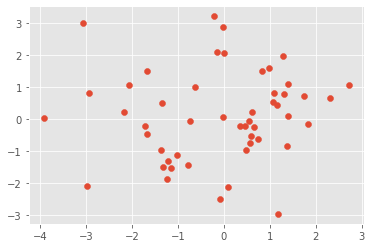

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:,0], data[:,1])
plt.show()

Путём диагонализации истинной матрицы ковариаций  C , мы можем найти преобразование исходного набора данных, компоненты которого наилучшим образом будут описывать дисперсию, с учётом их ортогональности друг другу:

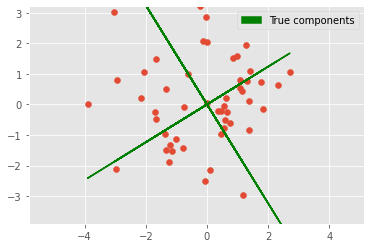

In [4]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

А теперь сравним эти направления с направлениями, которые выбирает метод главных компонент:

In [5]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

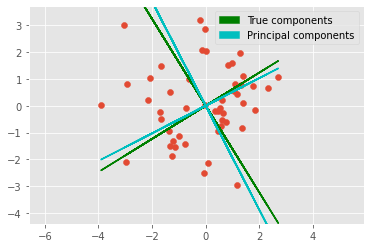

In [6]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

Видно, что уже при небольшом количестве данных они отличаются незначительно. Увеличим размер выборки:

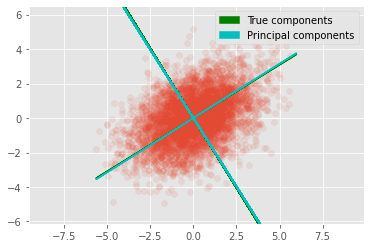

In [7]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:,0], data_large[:,1], alpha=0.1)
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_large[:,0], (W_true[0,0]/W_true[0,1])*data_large[:,0], color="g")
plt.plot(data_large[:,0], (W_true[1,0]/W_true[1,1])*data_large[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

В этом случае главные компоненты значительно точнее приближают истинные направления данных, вдоль которых наблюдается наибольшая дисперсия.

#### Задание 1. 
Автоматическое уменьшение размерности данных при помощи логарифма правдоподобия  L 
Рассмотрим набор данных размерности  D , чья реальная размерность значительно меньше наблюдаемой (назовём её  d ). От вас требуется:

1.Для каждого значения  d^  в интервале [1,D] построить модель PCA с  d^  главными компонентами.

2.Оценить средний логарифм правдоподобия данных для каждой модели на генеральной совокупности, используя метод кросс-валидации с 3 фолдами (итоговая оценка значения логарифма правдоподобия усредняется по всем фолдам).

3.Найти модель, для которой он максимален, и внести в файл ответа число компонент в данной модели, т.е. значение  d^opt

In [9]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()


In [11]:
data = pd.read_csv('data_task1.csv')

In [12]:
data

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.238399,-1.311330,-0.782298,-0.341821,0.469353,-0.431860,0.602948,1.220206,1.525103,-0.991354,...,-0.559927,-0.532534,-0.465923,0.874697,-0.108972,-0.080328,0.448971,2.080754,-1.535373,-0.460125
1,-0.223940,-1.277836,-0.202433,-0.317682,0.081900,-0.624267,-0.577119,-0.489564,0.704099,-0.511071,...,-0.055943,-2.208109,0.027813,-1.663044,0.018190,-0.432993,1.204321,0.705121,-1.106140,0.145533
2,-0.278740,1.342790,-0.734591,0.618881,1.365690,-1.397553,-1.446412,-0.844917,0.845916,-1.574979,...,-1.616313,2.144484,-1.110290,-0.524140,-2.176645,-1.903969,1.715735,0.054220,-1.125896,1.309994
3,0.585189,0.344587,1.512917,0.272105,0.480314,-0.688009,-1.473050,-0.732295,0.407361,0.900369,...,1.107443,-0.948995,0.555096,0.645465,1.291971,0.690657,-0.322088,0.341865,-1.436627,0.231027
4,0.992821,-0.654237,2.431634,-1.167275,0.347093,0.772373,0.766213,-0.441367,0.632604,1.543905,...,0.088682,1.357311,0.739249,-0.213874,0.521273,-0.885125,-1.262695,0.974920,1.139357,-0.104045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.389692,0.219276,1.705347,0.639056,-0.920221,0.820060,-1.319743,0.576356,-1.683934,-0.145866,...,0.477906,1.793263,0.042314,0.579344,1.133539,0.855891,-1.057393,0.424905,0.779232,-1.559978
2996,1.224061,0.372410,2.461428,-1.052051,0.784136,-1.312349,0.166328,-0.486050,0.200969,-0.759246,...,0.211499,0.946581,-1.410370,0.981908,1.003461,-0.106305,0.144014,-0.865218,1.802963,-0.190356
2997,-0.729235,0.921636,-1.290264,1.213381,-0.855209,-2.459783,0.383566,-0.938353,0.062706,-0.289529,...,-1.340029,0.217846,0.748483,1.869968,-0.786416,0.864130,-1.277036,-0.729173,-0.544436,-1.723106
2998,0.494367,-0.388574,0.839700,1.326939,-0.255756,0.587837,1.028524,0.840790,-0.223695,0.187612,...,-0.813682,0.820564,-0.684508,2.170824,-0.759302,0.891681,-0.656515,0.142067,0.174918,1.545366


In [13]:
D = data.shape[1]

In [24]:
scores = []
for d in range(1, D+1):
    model = PCA(n_components=d, svd_solver='full')
    model.fit(data)
    scores.append(cv_score(model, data, cv=3).mean())

In [25]:
d_scores = np.array(scores)

In [26]:
d_opt = np.argmax(d_scores)+1

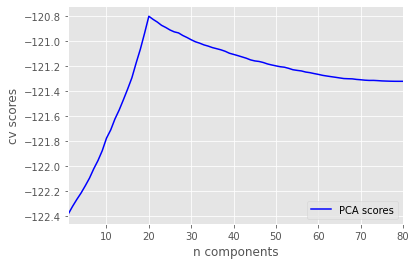

In [27]:
plot_scores(d_scores)

#### Задание 2. 
Ручное уменьшение размерности признаков посредством анализа дисперсии данных вдоль главных компонент
Рассмотрим ещё один набор данных размерности  D , чья реальная размерность значительно меньше наблюдаемой (назовём её также  d ). От вас требуется:

1.Построить модель PCA с  D  главными компонентами по этим данным.

2.Спроецировать данные на главные компоненты.

3.Оценить их дисперсию вдоль главных компонент.

4.Отсортировать дисперсии в порядке убывания и получить их попарные разности:  λ(i−1)−λ(i) .

5.Найти разность с наибольшим значением и получить по ней оценку на эффективную размерность данных  d^ .

6.Построить график дисперсий и убедиться, что полученная оценка на  d^opt  действительно имеет смысл, после этого внести полученное значение  d^opt  в файл ответа.

In [28]:
def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()

In [29]:
data = pd.read_csv('data_task2.csv')

In [31]:
D = data.shape[1]

In [32]:
model = PCA(n_components=D, svd_solver='full')
model.fit(data)

PCA(n_components=100, svd_solver='full')

In [42]:
d_variances = model.explained_variance_

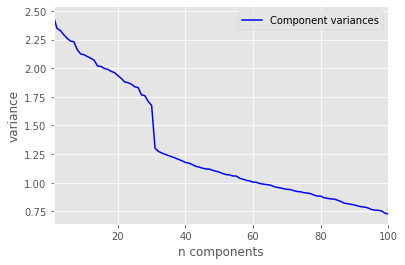

In [43]:
plot_variances(d_variances)